# Lesson 2 Assignment

In [1]:
import requests
import urllib

In [2]:
url='https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'

In [3]:
def getResponse(url):
    response = urllib.request.urlopen(url)
    html = response.read().decode('utf8')
    protocal, rest=urllib.request.splittype(url)
    domain=urllib.request.splithost(rest)[0]
    return protocal,domain,html

In [4]:
protocal,domain,html=getResponse(url)

In [5]:
import re

In [6]:
pattern=re.compile(r'\<a target\=\_blank href\=\"(.+?)\"\>(北京地铁\w+?线)\<\/a\>')

In [7]:
sub_link_list=pattern.findall(html)

In [8]:
sub_link_dic={name: (protocal + r'://' + domain + link) for link,name in sub_link_list }
list(sub_link_dic.items())

[('北京地铁1号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF'),
 ('北京地铁13号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF'),
 ('北京地铁八通线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF'),
 ('北京地铁5号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF'),
 ('北京地铁8号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF'),
 ('北京地铁10号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF'),
 ('北京地铁机场线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF'),
 ('北京地铁4号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF'),
 ('北京地铁15号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF'),
 ('北京地铁昌平线',
  'https://baike.baidu.com/it

In [9]:
sub_line_station={}#地铁map 字典

In [10]:
def wrong_station(wrong_list, name):
    for l in wrong_list:
        if (l in name) or (len(name)==1) : 
            return False
    return True

In [11]:
for key ,value in sub_link_dic.items():
    p,d, h=getResponse(value)
    h=h.replace('\n','')
    pattern_table=re.compile('<table.*?<\/table>')
    table_list=pattern_table.findall(h)
    for t in table_list:
        pattern_time_table=re.compile('<table.*(时刻表|时间表).*table>')
        if pattern_time_table.match(t):
            pattern_station_name=re.compile(">(\w+?)<")
            station_list=pattern_station_name.findall(t)
            station_list_cleared=[station.strip() for station in station_list if wrong_station(['时刻表','方向','时间','名称','车站','显示','往','全程','终点','首班车','末班车'
                                                                                               ,'备注','半程','暂缓开通'],station)]
            lengh=len(station_list_cleared)
            line_sation_remove_duplicate=sorted(set(station_list_cleared),key=station_list_cleared.index)
            if station_list_cleared[0]==station_list_cleared[lengh-1]:
                line_sation_remove_duplicate.append(station_list_cleared[0])
            sub_line_station[key]=line_sation_remove_duplicate
#             print(sub_line_station)

In [12]:
sub_line_station

{'北京地铁1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '北京地铁13号线': ['西直门',
  '明光桥西',
  '大钟寺',
  '知春路',
  '五道口',
  '清华东路西口',
  '上地',
  '清河站',
  '西二旗',
  '龙泽',
  '回龙观',
  '霍营',
  '建材城东路',
  '立水桥',
  '北苑',
  '来广营西',
  '望京西',
  '望和桥',
  '芍药居',
  '光熙门',
  '柳芳',
  '东直门'],
 '北京地铁八通线': ['四惠',
  '四惠东',
  '高碑店',
  '传媒大学',
  '双桥',
  '管庄',
  '八里桥',
  '通州北苑',
  '果园',
  '九棵树',
  '梨园',
  '临河里',
  '土桥'],
 '北京地铁5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑',
  '天通苑北'],
 '北京地铁8号线': ['瀛海',
  '德茂',
  '五福堂',
  '火箭万源',
  '东高地',
  '和义',
  '大红门南',
  '大红门',
  '海户屯',
  '木樨园',
  '永定门外',
  '天桥',
  '珠市口'],
 '北京地铁10号线': ['巴沟',
  '成寿寺',
  '车道沟',
  '苏州街',
  '海淀黄庄',
  '知春里',
  '知春路',
  '西土

In [13]:
import matplotlib
print(matplotlib.__path__)

['D:\\sgmuserprofile\\sjbgwk\\PycharmProjects\\TestAndLearn\\venv\\Lib\\site-packages\\matplotlib']


In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
station_set=set()#station list
for key ,value in sub_line_station.items():
    for name in value: station_set.add(name)

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #使matiplot支持中文字体
plt.rcParams['axes.unicode_minus'] = False

In [17]:
g=nx.Graph()
g.add_nodes_from(list(station_set))

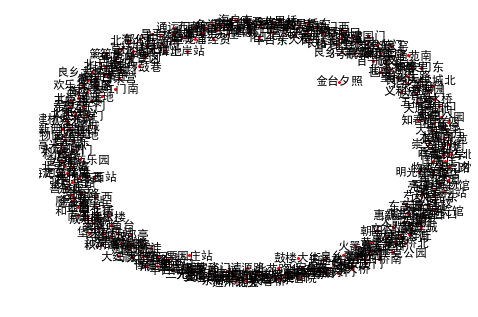

In [18]:
nx.draw(g,with_labels=True,node_size=4)

In [19]:
# remove duplicated data in sub_line_station

In [20]:
def get_neighbors(line_stations,station):
    index=line_stations.index(station)
    if index>0 and index<len(line_stations)-1:
        return [line_stations[index-1], line_stations[index+1]]
    elif index==0: return [line_stations[index+1]]
    elif index==len(line_stations)-1: return [line_stations[index-1]]

In [21]:
get_neighbors(sub_line_station['北京地铁10号线'],'分钟寺')

['十里河', '宋家庄']

In [22]:
station_connection_dic={}
for key, value_list in sub_line_station.items():
    for name in value_list:
        if name not in station_connection_dic.keys():
            station_connection_dic[name]=get_neighbors(value_list,name)
        else:
            station_connection_dic[name].extend(get_neighbors(value_list,name))

In [23]:
for key,value in station_connection_dic.items():
    value=list(set(value))
    if key in value: value.remove(key)
    station_connection_dic[key]=value

In [24]:
station_connection_dic

{'苹果园': ['杨庄', '古城', '金安桥'],
 '古城': ['八角游乐园', '苹果园'],
 '八角游乐园': ['八宝山', '古城'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['五棵松', '八宝山'],
 '五棵松': ['万寿路', '玉泉路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '莲花桥', '西钓鱼台', '军事博物馆'],
 '军事博物馆': ['白堆子', '木樨地', '北京西站', '公主坟'],
 '木樨地': ['南礼士路', '军事博物馆'],
 '南礼士路': ['复兴门', '木樨地'],
 '复兴门': ['长椿街', '南礼士路', '西单', '阜成门'],
 '西单': ['宣武门', '天安门西', '菜市口', '复兴门', '灵境胡同'],
 '天安门西': ['天安门东', '西单'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['东单', '天安门东'],
 '东单': ['灯市口', '建国门', '王府井', '崇文门'],
 '建国门': ['东单', '朝阳门', '北京站', '永安里'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['双井', '金台夕照', '大望路', '永安里'],
 '大望路': ['四惠', '国贸', '金台路', '九龙山'],
 '四惠': ['四惠东', '大望路'],
 '四惠东': ['四惠', '高碑店'],
 '西直门': ['角门西', '明光桥西', '新街口', '公益西桥', '积水潭', '动物园'],
 '明光桥西': ['西直门', '大钟寺'],
 '大钟寺': ['明光桥西', '知春路'],
 '知春路': ['知春里', '西土城', '大钟寺', '五道口'],
 '五道口': ['知春路', '清华东路西口'],
 '清华东路西口': ['上地', '六道口', '五道口'],
 '上地': ['清华东路西口', '清河站'],
 '清河站': ['上地', '西二旗'],
 '西二旗': ['龙泽', '清河站', '生命科学园'],
 '龙泽': ['回龙观', '西二旗'],
 '回龙观': 

In [25]:
station_connection_dic['复兴门']

['长椿街', '南礼士路', '西单', '阜成门']

In [26]:
sub_station_graph=nx.Graph(station_connection_dic)

D:\sgmuserprofile\sjbgwk\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


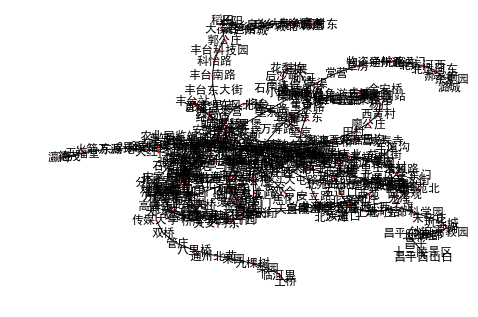

In [27]:
nx.draw(sub_station_graph,with_labels=True,node_size=1)

# Breadth/Depth First Search

In [125]:
test=nx.Graph([[1,2],[2,3],[3,4],[4,5],[5,6],[6,1],[1,7],[1,8],[6,7],[7,8],[8,2],[7,5],[8,3]])

D:\sgmuserprofile\sjbgwk\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


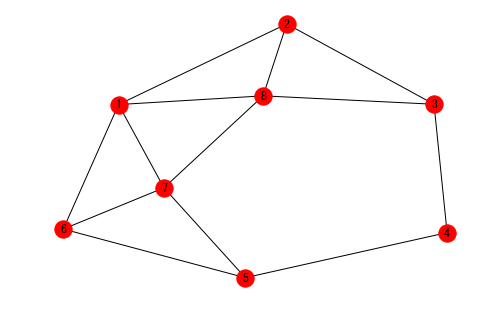

In [118]:
nx.draw(test,with_labels=True)

In [100]:
def search(g,start,end,func):
    paths=[[start]]
    seen=set()
    result_paths=[]
    while paths:
        path=paths.pop(0)#广度优先
#         path=paths.pop()#深度优先
        last_station= path[-1]
#         if last_station in seen: 
#             continue 
#         else:
#             seen.add(last_station)
        child_stations=g[last_station]
        for s in child_stations:
            if s in path: continue
            tpath=path+[s]
            paths.append(tpath)
#             if tpath[-1]==end: return tpath
            if tpath[-1]==end: 
                result_paths.append(tpath)
        if len(result_paths)>3: 
            return func(result_paths)

In [126]:
search(sub_station_graph,'西单','平安里',lambda x: sorted(x,key=len)[0]) #换乘最少

['西单', '灵境胡同', '西四', '平安里']

In [131]:
a=search(test,1,2,lambda x: x)
a

[[1, 2], [1, 8, 2], [1, 7, 8, 2], [1, 8, 3, 2]]